# Proyek Predictive Analysis
# Laporan Proyek Machine Learning - Damar Syarafi Ramadhan
# Forecast Retail Sales Data

# Import

## Load Kagglehub

In [1]:
!pip install kagglehub -q

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdullah0a/retail-sales-data-with-seasonal-trends-and-marketing/versions/1")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/retail-sales-data-with-seasonal-trends-and-marketing


## Import library and file

In [3]:
import os
import pandas as pd

csv_path = os.path.join(path, "Retail_sales.csv")

# Baca dataset
df = pd.read_csv(csv_path)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df.head()

,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,Wednesday,False


# Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store ID               30000 non-null  object 
 1   Product ID             30000 non-null  int64  
 2   Date                   30000 non-null  object 
 3   Units Sold             30000 non-null  int64  
 4   Sales Revenue (USD)    30000 non-null  float64
 5   Discount Percentage    30000 non-null  int64  
 6   Marketing Spend (USD)  30000 non-null  int64  
 7   Store Location         30000 non-null  object 
 8   Product Category       30000 non-null  object 
 9   Day of the Week        30000 non-null  object 
 10  Holiday Effect         30000 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 2.3+ MB


Isi Dataset berisikan :
- Sales Revenue (USD): Jumlah pendapatan yang didapat dari penjualan.
- Units Sold: Jumlah item produk terjual.
- Discount Percentage: Persentase Diskon yang dipasang pada produk tertentu.
- Marketing Spend (USD): Budget yang dikerahkan untuk promo marketing.
- Store ID: Identifier toko jual.
- Product Category: Kategori produk yang dijual (e.g., Electronics, Clothing).
- Date: Tanggal ketika penjualan terjadi.
- Store Location: Lokasi Geografis Toko.
- Day of the Week: Hari ketika penjualan terjadi.
- Holiday Effect: Indikator apakah penjualan terjadi selama periode liburan.

In [7]:
df.rename(columns={'Store ID': 'store_ID',
                   'Product ID': 'product_ID',
                   'Store Name': 'store_name',
                   'Date':'date',
                   'Units Sold':'units_sold',
                   'Sales Revenue (USD)':'sales_revenue',
                   'Discount Percentage':'discount_percentage',
                   'Marketing Spend (USD)':'marketing_spend',
                   'Store Location':'store_location',
                   'Product Category':'product_category',
                   'Holiday Effect':'Holiday',
                   'Day of the Week':'Weekdays'}, inplace=True)
df.head()

,store_ID,product_ID,date,units_sold,sales_revenue,discount_percentage,marketing_spend,store_location,product_category,Weekdays,Holiday
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,Wednesday,False


In [8]:
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Year'] = df['date'].dt.year

In [9]:
df.drop(columns=['store_ID','product_ID',], inplace=True)

**Memisahkan format penanggalan menjadi fitur numerik agar dapat digunakan sebagai input model regresi nanti.**

Lalu Menghapus ID Store dan product yang tidak terpakai.

In [10]:
df.describe(include='all').style.background_gradient('Greens_r')

,date,units_sold,sales_revenue,discount_percentage,marketing_spend,store_location,product_category,Weekdays,Holiday,Month,Day,Year
count,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000,30000,30000,30000,30000.000000,30000.000000,30000.000000
unique,nan,nan,nan,nan,nan,243,4,7,2,nan,nan,nan
top,nan,nan,nan,nan,nan,Korea,Furniture,Saturday,False,nan,nan,nan
freq,nan,nan,nan,nan,nan,237,9503,4310,29836,nan,nan,nan
mean,2022-12-31 15:51:24.480000256,6.161967,2749.509593,2.973833,49.944033,nan,nan,nan,nan,6.513133,15.699733,2022.501567
min,2022-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,nan,1.000000,1.000000,2022.000000
25%,2022-07-02 00:00:00,4.000000,882.592500,0.000000,0.000000,nan,nan,nan,nan,4.000000,8.000000,2022.000000
50%,2023-01-01 00:00:00,6.000000,1902.420000,0.000000,1.000000,nan,nan,nan,nan,7.000000,16.000000,2023.000000
75%,2023-07-03 00:00:00,8.000000,3863.920000,0.000000,100.000000,nan,nan,nan,nan,10.000000,23.000000,2023.000000
max,2024-01-01 00:00:00,56.000000,27165.880000,20.000000,199.000000,nan,nan,nan,nan,12.000000,31.000000,2024.000000


In [11]:
df.isna().sum()

,0
date,0
units_sold,0
sales_revenue,0
discount_percentage,0
marketing_spend,0
store_location,0
product_category,0
Weekdays,0
Holiday,0
Month,0


In [12]:
df.duplicated().sum()

np.int64(0)

## EDA

### Visualisasi tren penjualan harian untuk mengidentifikasi pola musiman dan outlier.

In [13]:
# Keuntungan Sales Sehari-hari
sales_over_time = df.groupby('date')['sales_revenue'].sum()
print(sales_over_time)
# Visualisasi data
fig = px.line(sales_over_time, title='Sales Revenue Over Time', markers=True)

fig.update_layout(title='Sales Revenue Over Time',
                  xaxis_title='Holiday Effect',
                  yaxis_title='Sales Revenue (USD)')
fig.show()

date
2022-01-01    120732.59
2022-01-02    113006.90
2022-01-03     85866.48
2022-01-04     88386.06
2022-01-05     84535.30
                ...    
2023-12-28    115585.74
2023-12-29    121775.68
2023-12-30    138061.57
2023-12-31    147722.62
2024-01-01     80674.87
Name: sales_revenue, Length: 731, dtype: float64


**Insight yang didapatkan :**
- Terdapat pattern lonjakan yang sangat signifikan penjualan antara bulan November - Desember yang kemungkinan disebabkan promo akhir tahun.

In [14]:
store_sales = df.groupby('store_location')['units_sold'].sum().reset_index()
store_sales.sort_values(by='units_sold', ascending=False)

,store_location,units_sold
49,Congo,1474
114,Korea,1398
219,Tonga,971
86,Guam,963
240,Yemen,929
...,...,...
103,Ireland,569
76,Gabon,569
75,French Southern Territories,555
220,Trinidad and Tobago,554


### Rata-rata Marketing untuk Masing Product

In [15]:
# Penjualan per kategori
per_category_sales = df.groupby('product_category')['marketing_spend'].mean().reset_index()
per_category_sales.sort_values(by='marketing_spend', ascending=False)

,product_category,marketing_spend
1,Electronics,50.490859
3,Groceries,50.440321
2,Furniture,49.598022
0,Clothing,49.337016


**Insight yang didapatkan :**
- Pengerahan budget marketing sama rata pada semua kategori product.

### Penjualan Per Produk Per Bulan

In [16]:
# Penjualan produk per bulan
product_sales_month = df.groupby(['Month', 'product_category'])[['sales_revenue', 'units_sold']].sum().reset_index()
#product_sales_month = product_sales_month.sort_values(by='sales_revenue', ascending=False)
product_sales_month

,Month,product_category,sales_revenue,units_sold
0,1,Clothing,1569680.13,3055
1,1,Electronics,2164232.09,4183
2,1,Furniture,1697429.02,4353
3,1,Groceries,855240.41,2564
4,2,Clothing,1395328.65,2671
5,2,Electronics,1912941.71,3706
6,2,Furniture,1469350.64,3782
7,2,Groceries,789654.88,2335
8,3,Clothing,1550909.87,2955
9,3,Electronics,2137264.17,4122


In [17]:
fig = px.line(product_sales_month, x='Month', y='sales_revenue', color='product_category')
fig.update_layout(title='Sales Revenue Over Month by Product Category',
                  xaxis_title='Month',
                  yaxis_title='Sales Revenue (USD)')
fig.show()

In [18]:
fig = px.line(product_sales_month, x='Month', y='units_sold', color='product_category')
fig.update_layout(title='Units Sold Over Month by Product Category',
                  xaxis_title='Month',
                  yaxis_title='Units Sould')
fig.show()

**Insight Yang didapatkan :**
- Saat lonjakan penjualan terjadi : Barang elektronik dan *furniture* mengalami penjualan yang drastis
- *Groceries* mengalami penjualan stagnan/stabil karena dibutuhkan setiap bulan.

### Penjualan Terjadi pada Hari libur

In [19]:
holiday_sales = df.groupby('Holiday')['units_sold'].sum().reset_index()
holiday_sales

,Holiday,units_sold
0,False,182677
1,True,2182


## Heatmap Correlation

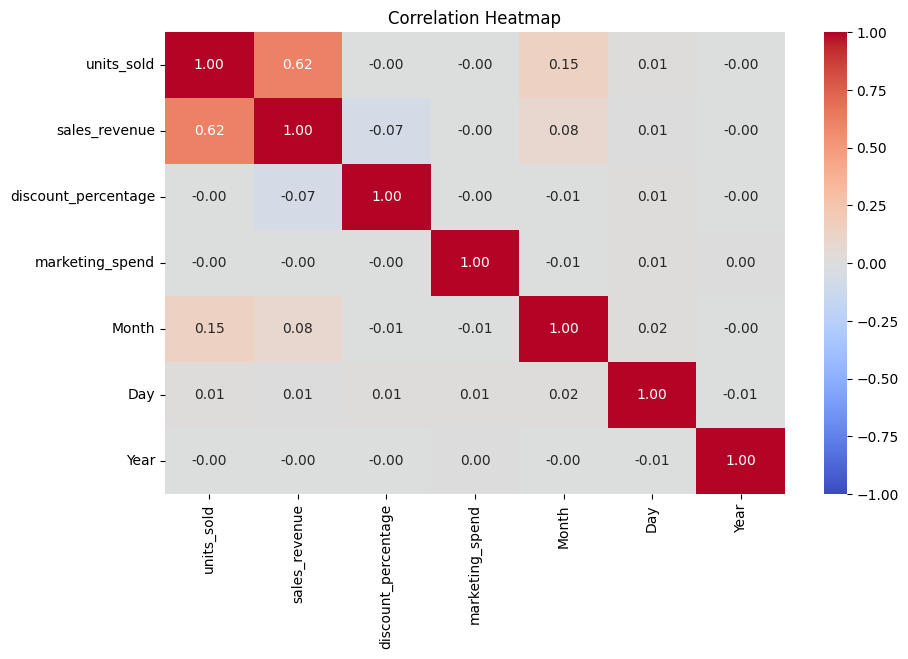

In [20]:
# Create a correlation heatmap
numeric_cols_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols_df.corr(), annot=True, cmap='coolwarm', center=0, vmin=-1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Feature Correlation

In [21]:
fig = px.scatter_matrix(df,
                       dimensions=['marketing_spend', 'discount_percentage', 'sales_revenue'],
                       color='product_category',
                       title='Scatter Matrix of Marketing Spend, Discount Percentage, and Sales Revenue')
fig.show()

**Insight yang didapatkan :**
- Korelasi dengan Marketing Spend : Anggaran yang lebih tinggi kemungkinan besar menarik perhatian pelanggan ke produk atau toko, penjualan menjadi tinggi dan otomatis pendapatan menaik drastis.
- Korelasi dengan Diskon : Diskon biasanya bertujuan untuk mengurangi unit yang tersedia di gudang agar tidak *over capacity* sehingga mengurangi harga produk dengan persentase ditentukan, dengan resiko pendapatan berkurang dari harga biasa product.

# Data Preparation

## Handling Missing Value & Duplicate

In [23]:
clean_df = df.copy()

In [24]:
clean_df.isna().sum()

,0
date,0
units_sold,0
sales_revenue,0
discount_percentage,0
marketing_spend,0
store_location,0
product_category,0
Weekdays,0
Holiday,0
Month,0


In [25]:
clean_df.duplicated().sum()

np.int64(0)

Tidak ada Data Duplikat dan Kosong : **Tidak perlu Pengolahan *Drop* .**

## Label Encoder

In [26]:
categorical_cols = ['store_location', 'product_category', 'Weekdays', 'Holiday']

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical_cols:
    clean_df[col] = le.fit_transform(clean_df[col])

Menerapkan Labelisasi pada feature categorical sebagai representasi numerik sebagai input model nantinya.

## Standardization

In [28]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['units_sold', 'discount_percentage', 'marketing_spend']
scaler = StandardScaler()
clean_df[numerical_cols] = scaler.fit_transform(clean_df[numerical_cols])
clean_df.head()

,date,units_sold,sales_revenue,discount_percentage,marketing_spend,store_location,product_category,Weekdays,Holiday,Month,Day,Year
0,2022-01-01,0.853833,2741.69,2.849839,0.482231,214,2,2,0,1,1,2022
1,2022-01-02,0.252126,2665.53,-0.497760,-0.775521,135,2,3,0,1,2,2022
2,2022-01-03,-1.552997,380.79,-0.497760,-0.775521,186,2,1,0,1,3,2022
3,2022-01-04,-0.650436,1523.16,-0.497760,-0.775521,12,2,5,0,1,4,2022
4,2022-01-05,-1.252144,761.58,-0.497760,-0.775521,208,2,6,0,1,5,2022


Proses untuk mengubah data agar memiliki format dan struktur yang konsisten sehingga dapat diproses dan dianalisis dengan lebih mudah dan efisien.

## IQR

**IQR** adalah konsep statistik yang terkait dengan distribusi data, dan penggunaannya untuk outlier adalah salah satu aplikasi utamanya. IQR mewakili rentang nilai yang mencakup 50% bagian tengah data Anda ketika diurutkan. Ini adalah ukuran penyebaran data yang "tahan" terhadap nilai-nilai ekstrem.

- Kuartil Pertama (Q1): Nilai di bawahnya terletak 25% data.
- Kuartil Ketiga (Q3): Nilai di bawahnya terletak 75% data (atau 25% data terletak di atasnya).
- IQR: Adalah perbedaan antara Kuartil Ketiga (Q3) dan Kuartil Pertama (Q1). IQR = Q3 - Q1

In [29]:
cols = clean_df.columns

In [30]:
# Cek Outlier dengan IQR Outlier
def outlier_iqr(data):
    outliers = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    for i in data:
        if i < lower_bound or i > upper_bound:
            outliers.append(i)
    return outliers

print('Before Drop Outliers')
data_outlier = {}
for col in numeric_cols_df:
    data_outlier[col] = outlier_iqr(clean_df[col])
    print('Outlier (' + col + '):', len(data_outlier[col]), 'outliers')

Before Drop Outliers
Outlier (units_sold): 912 outliers
Outlier (sales_revenue): 1305 outliers
Outlier (discount_percentage): 7154 outliers
Outlier (marketing_spend): 0 outliers
Outlier (Month): 0 outliers
Outlier (Day): 0 outliers
Outlier (Year): 0 outliers


In [31]:
#Drop Outliers
def dropOutlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df = np.where(df > upper_bound, upper_bound, df)
    df = np.where(df < lower_bound, lower_bound, df)
    return df

for col in numeric_cols_df:
    clean_df[col] = dropOutlier(clean_df[col])

print('After Drop Outliers')
data_outlier = {}
for col in numeric_cols_df:
    data_outlier[col] = outlier_iqr(clean_df[col])
    print('Outlier (' + col + '):', len(data_outlier[col]), 'outliers')

After Drop Outliers
Outlier (units_sold): 0 outliers
Outlier (sales_revenue): 0 outliers
Outlier (discount_percentage): 0 outliers
Outlier (marketing_spend): 0 outliers
Outlier (Month): 0 outliers
Outlier (Day): 0 outliers
Outlier (Year): 0 outliers


## Train-Test Split

Langkah fundamental dalam alur kerja Machine Learning. Tujuan utamanya adalah untuk mengevaluasi kinerja model Anda pada data yang belum pernah dilihatnya selama pelatihan.



In [32]:
cols

Index(['date', 'units_sold', 'sales_revenue', 'discount_percentage',
       'marketing_spend', 'store_location', 'product_category', 'Weekdays',
       'Holiday', 'Month', 'Day', 'Year'],
      dtype='object')

In [33]:
# A simple lag 1 feature
clean_df['sales_revenue_lag_1'] = clean_df['sales_revenue'].shift(1)
clean_df.head()

,date,units_sold,sales_revenue,discount_percentage,marketing_spend,store_location,product_category,Weekdays,Holiday,Month,Day,Year,sales_revenue_lag_1
0,2022-01-01,0.853833,2741.69,-0.49776,0.482231,214,2,2,0,1.0,1.0,2022.0,NaN
1,2022-01-02,0.252126,2665.53,-0.49776,-0.775521,135,2,3,0,1.0,2.0,2022.0,2741.69
2,2022-01-03,-1.552997,380.79,-0.49776,-0.775521,186,2,1,0,1.0,3.0,2022.0,2665.53
3,2022-01-04,-0.650436,1523.16,-0.49776,-0.775521,12,2,5,0,1.0,4.0,2022.0,380.79
4,2022-01-05,-1.252144,761.58,-0.49776,-0.775521,208,2,6,0,1.0,5.0,2022.0,1523.16


In [34]:
clean_df.dropna(inplace=True) # Add this line to drop rows with NaN

In [35]:
from sklearn.model_selection import train_test_split

features = ['units_sold', 'Day', 'Month', 'Year',
               'discount_percentage', 'marketing_spend', 'store_location',
               'product_category', 'Weekdays', 'Holiday',
               'sales_revenue_lag_1'] # Added the lagged feature
target = 'sales_revenue'

X = clean_df[features]  # Semua kolom kecuali target
y = clean_df[target]               # Kolom target

split_date = clean_df['date'].iloc[int(len(clean_df) * 0.8)]

X_train_ts = clean_df[clean_df['date'] < split_date][features]
y_train_ts = clean_df[clean_df['date'] < split_date][target]
X_test_ts = clean_df[clean_df['date'] >= split_date][features]
y_test_ts = clean_df[clean_df['date'] >= split_date][target]

# Ensure the shapes make sense
print(f"Train set shape: {X_train_ts.shape}, {y_train_ts.shape}")
print(f"Test set shape: {X_test_ts.shape}, {y_test_ts.shape}")

Train set shape: (24956, 11), (24956,)
Test set shape: (5043, 11), (5043,)


Untuk data deret waktu, Train-Test Split tidak boleh dilakukan secara acak. Data harus dibagi berdasarkan waktu secara berurutan. Bagian data yang lebih awal digunakan untuk pelatihan, dan bagian data yang lebih akhir digunakan untuk pengujian. Melakukan split acak akan menyebabkan data leakage

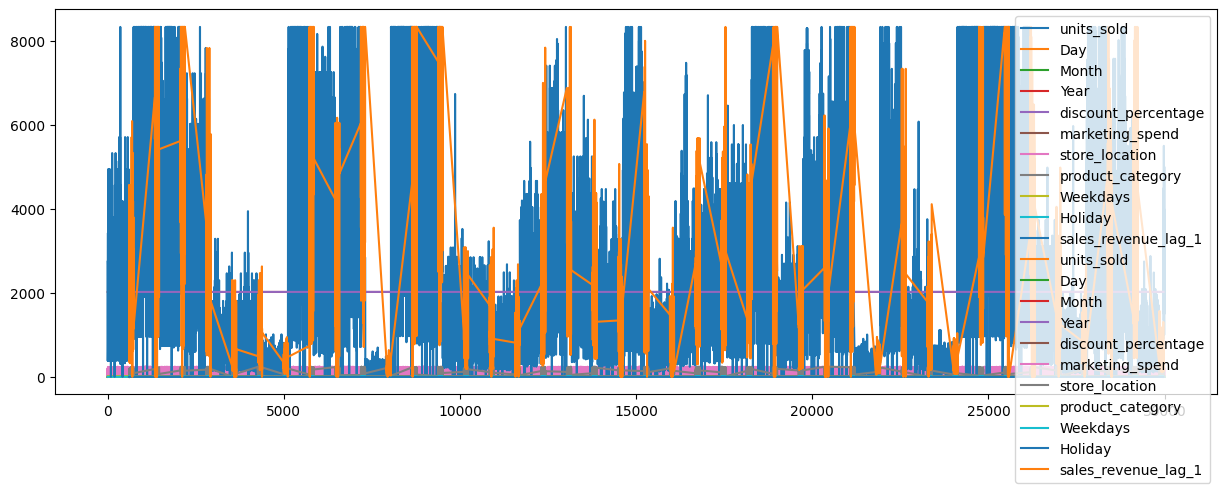

In [36]:
fig, ax = plt.subplots(figsize=(15, 5))
X_train_ts.plot(ax=ax, label='Training Set')
X_test_ts.plot(ax=ax, label='Test Set')
plt.show()

# Model : Regression

Karena kita akan membuat model **Predictive Modeling** **Time Series** yang berhubungan dengan mengetahui data perkiraan terkait apa yang mungkin terjadi beberapa waktu mendatang.

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
# Initialize list to collect results
results = []

# Function to evaluate models and store results for visualization
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):

    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_test = model.predict(X_test)

    # Calculate metrics: R² and RMSE
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Print results
    print(f"{model_name} Model:")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}\n")

    # Append results to the list for visualization
    results.append({'Model': model_name, 'R²': test_r2, 'RMSE': test_rmse})

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# Initialize models
models = {
    'Linear Regression' : LinearRegression(),
    'Ridge Regression' : Ridge(),
    'Lasso Regression' : Lasso(),
    'ElasticNet Regression' : ElasticNet(),
    "XGBRegressor": XGBRegressor(),
}

## Evaluation

In [39]:
# Iterate over the models to evaluate each
for model_name, model in models.items():
    evaluate_model(model, X_train_ts, y_train_ts, X_test_ts, y_test_ts, model_name)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

Linear Regression Model:
Test R²: 0.6748
Test RMSE: 1342.9899

Ridge Regression Model:
Test R²: 0.6748
Test RMSE: 1342.9773

Lasso Regression Model:
Test R²: 0.6750
Test RMSE: 1342.5347

ElasticNet Regression Model:
Test R²: 0.6525
Test RMSE: 1388.2127

XGBRegressor Model:
Test R²: 0.8314
Test RMSE: 966.8470



XGBRegressor menghasilkan skor **R Square** yang paling tinggi, maka diputuskan untuk menggunakan model XGBRegressor untuk **Predictive Model Time Series**.

In [40]:
# Initialize and train a model (using XGBoost as it was the last one)
model_ts = XGBRegressor()

# Train the model using the time series split data
model_ts.fit(X_train_ts, y_train_ts)

# Make predictions on the test set (future data)
y_pred_test_ts = model_ts.predict(X_test_ts)

# Evaluate the model
test_r2_ts = r2_score(y_test_ts, y_pred_test_ts)
test_rmse_ts = np.sqrt(mean_squared_error(y_test_ts, y_pred_test_ts))

print("\nXGBoost Model with Time Series Features:")
print(f"Test R²: {test_r2_ts:.4f}")
print(f"Test RMSE: {test_rmse_ts:.4f}\n")


XGBoost Model with Time Series Features:
Test R²: 0.8314
Test RMSE: 966.8470



In [41]:
y_pred_test_ts

array([4181.708  , 2084.3167 , 3151.0806 , ...,  634.28265, 1019.9159 ,
        891.7559 ], dtype=float32)

In [42]:
print("\n--- Checks before creating plot_df ---")
print("Shape of y_test_ts:", y_test_ts.shape)
print("Shape of y_pred_test_ts:", y_pred_test_ts.shape) # This is a numpy array

print("Are there NaNs in y_test_ts?", y_test_ts.isna().any())
print("Are there NaNs in y_pred_test_ts?", pd.Series(y_pred_test_ts).isna().any())

# Check the first few values of y_test_ts and y_pred_test_ts
print("y_test_ts head:\n", y_test_ts.head())
print("y_pred_test_ts head:\n", pd.Series(y_pred_test_ts).head()) # Convert to Series for head()

# Check the last few values
print("y_test_ts tail:\n", y_test_ts.tail())
print("y_pred_test_ts tail:\n", pd.Series(y_pred_test_ts).tail())

# Check if 'date' column is in clean_df
if 'date' not in clean_df.columns:
    print("Error: 'date' column not found in clean_df!")

# Check if any of the test indices are present in clean_df's index
print("Are test indices in clean_df index?", X_test_ts.index.isin(clean_df.index).all())


--- Checks before creating plot_df ---
Shape of y_test_ts: (5043,)
Shape of y_pred_test_ts: (5043,)
Are there NaNs in y_test_ts? False
Are there NaNs in y_pred_test_ts? False
y_test_ts head:
 608    4188.69
609    1523.16
610    4569.48
611    2170.50
612    1142.37
Name: sales_revenue, dtype: float64
y_pred_test_ts head:
 0    4181.708008
1    2084.316650
2    3151.080566
3    3632.150879
4     961.959961
dtype: float32
y_test_ts tail:
 29966    784.92
29967    130.82
29968    654.10
29969    654.10
29970    915.74
Name: sales_revenue, dtype: float64
y_pred_test_ts tail:
 5038     925.287903
5039      55.238979
5040     634.282654
5041    1019.915894
5042     891.755920
dtype: float32
Are test indices in clean_df index? True


In [43]:
# After training the model and making predictions on the test set:
# with the correct date index for plotting
y_test_ts_array = y_test_ts.to_numpy()
#y_pred_test_ts = pd.Series(y_pred_test_ts, index=X_test_ts.index)

# Get the corresponding dates for the test set
# Assuming clean_df still has the 'date' column and the index aligns with X_test_ts
test_dates = clean_df.loc[X_test_ts.index, 'date']
test_dates

,date
608,2023-09-01
609,2023-09-02
610,2023-09-03
611,2023-09-04
612,2023-09-05
...,...
29966,2023-12-28
29967,2023-12-29
29968,2023-12-30
29969,2023-12-31


In [44]:
y_test_ts_array

,sales_revenue
608,4188.69
609,1523.16
610,4569.48
611,2170.50
612,1142.37
...,...
29966,784.92
29967,130.82
29968,654.10
29969,654.10


In [45]:
y_pred_test_ts

array([4181.708  , 2084.3167 , 3151.0806 , ...,  634.28265, 1019.9159 ,
        891.7559 ], dtype=float32)

In [46]:
# Create a DataFrame for easier plotting
plot_df = pd.DataFrame({
    'Actual Sales Revenue': y_test_ts_array,
    'Predicted Sales Revenue': y_pred_test_ts
}, index=test_dates) # Use the actual dates as the index

# Check the plot_df to see if it has data
print("plot_df head:\n", plot_df.head())
print("plot_df shape:", plot_df.shape)

plot_df head:
             Actual Sales Revenue  Predicted Sales Revenue
date                                                     
2023-09-01                   NaN              4181.708008
2023-09-02                   NaN              2084.316650
2023-09-03                   NaN              3151.080566
2023-09-04                   NaN              3632.150879
2023-09-05                   NaN               961.959961
plot_df shape: (5043, 2)


In [47]:
# --- Plotting the results directly using plotly ---
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=plot_df.index, y=plot_df['Actual Sales Revenue'],
                          mode='lines+markers', name='Actual Sales Revenue'))

fig.add_trace(go.Scatter(x=plot_df.index, y=plot_df['Predicted Sales Revenue'],
                          mode='lines+markers', name='Predicted Sales Revenue',
                          line=dict(dash='dash')))

fig.update_layout(title='Actual vs. Predicted Sales Revenue (Test Set)',
                   xaxis_title='Date',
                   yaxis_title='Sales Revenue (USD)',
                   hovermode='x unified')

fig.show()